In [1]:
import glob
import os
from joblib import dump, load
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import warnings
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

for wind

In [2]:
# Define the locations and their coordinates
locations = {
    "Bern": (2595842.15, 1201548.69),
    "Brienz": (2646563.43, 1177603.88),
    "Buochs": (2674514.65, 1203568.08),
    "Interlaken": (2632995.62, 1171399.67),
    "Lugano": (2713926.15, 1094747.56),
    "Salavaux": (2569175.20, 1195846.24),
    "Sempach": (2657011.60, 1219718.50),
    "Gordevio": (2700590.96, 1119701.60),
    "Thun": (2614554.68, 1178201.33),
    "Morges": (2527116.10, 1150785.39)
}

# Open your datasets
path = '/scratch2/cwenger/ICON-CH1_monthly/ICON-CH1_gust_data/ICON-CH1-EPS_2024-08-12T12_agg.nc'
ds = xr.open_dataset(path)  # Replace with your actual dataset

# Loop through each location to find the nearest x and y and save variables
for name, (loc_x, loc_y) in locations.items():
    # Find the nearest grid cell
    nearest_x = ds.sel(x=loc_x, y=loc_y, method="nearest").x.values
    nearest_y = ds.sel(x=loc_x, y=loc_y, method="nearest").y.values

    # Save variables dynamically
    globals()[f"{name}_cell_x"] = nearest_x
    globals()[f"{name}_cell_y"] = nearest_y


locations_df = pd.DataFrame([(name, coord[0], coord[1]) for name, coord in locations.items()], columns=['name', 'x_coordinate', 'y_coordinate'])
# Add x_cell and y_cell columns to the dataframe
locations_df['x_cell_nearest'] = locations_df['name'].apply(lambda name: globals().get(f"{name}_cell_x"))
locations_df['y_cell_nearest'] = locations_df['name'].apply(lambda name: globals().get(f"{name}_cell_y"))
dump(locations_df, 'campgrounds_coordinates_gust.pkl')

['campgrounds_coordinates_gust.pkl']

for precip

In [3]:
# Define the locations and their coordinates
locations = {
    "Bern": (2595842.15, 1201548.69),
    "Brienz": (2646563.43, 1177603.88),
    "Buochs": (2674514.65, 1203568.08),
    "Interlaken": (2632995.62, 1171399.67),
    "Lugano": (2713926.15, 1094747.56),
    "Salavaux": (2569175.20, 1195846.24),
    "Sempach": (2657011.60, 1219718.50),
    "Gordevio": (2700590.96, 1119701.60),
    "Thun": (2614554.68, 1178201.33),
    "Morges": (2527116.10, 1150785.39)
}

# Open your datasets
path = '/scratch2/cwenger/ICON-CH1_monthly/ICON-CH1_08_2024_agg.nc'
ds = xr.open_dataset(path)  # Replace with your actual dataset

# Loop through each location to find the nearest x and y and save variables
for name, (loc_x, loc_y) in locations.items():
    # Find the nearest grid cell
    nearest_x = ds.sel(x=loc_x, y=loc_y, method="nearest").x.values
    nearest_y = ds.sel(x=loc_x, y=loc_y, method="nearest").y.values

    # Save variables dynamically
    globals()[f"{name}_cell_x"] = nearest_x
    globals()[f"{name}_cell_y"] = nearest_y


locations_df = pd.DataFrame([(name, coord[0], coord[1]) for name, coord in locations.items()], columns=['name', 'x_coordinate', 'y_coordinate'])
# Add x_cell and y_cell columns to the dataframe
locations_df['x_cell_nearest'] = locations_df['name'].apply(lambda name: globals().get(f"{name}_cell_x"))
locations_df['y_cell_nearest'] = locations_df['name'].apply(lambda name: globals().get(f"{name}_cell_y"))
dump(locations_df, 'campgrounds_coordinates_precip.pkl')

['campgrounds_coordinates_precip.pkl']

In [4]:
campgrounds_gust = load('campgrounds_coordinates_gust.pkl')
campgrounds_precip = load('campgrounds_coordinates_precip.pkl')

load wind and precip data

In [5]:
# Open your gust dataset
icon_path_gust = '/scratch2/cwenger/ICON-CH1_monthly/ICON-CH1_gust_data/ICON-CH1-EPS_2024-08-12T12_agg.nc'
ds_icon_gust = xr.open_dataset(icon_path_gust)

# Open your precipitation dataset
icon_path_precip = '/scratch2/cwenger/ICON-CH1_monthly/ICON-CH1_08_2024_agg.nc'
ds_icon_precip = xr.open_dataset(icon_path_precip)

select specific campground and extract window, for wind

In [6]:
# CHOOSE CAMPING SITE
c_name = 'Interlaken'

# Define the window size (in grid points)
full_window = 35
half_window = int((full_window-1)/2)

center_x = campgrounds_gust[campgrounds_gust['name'].str.contains(c_name)]['x_cell_nearest'].values[0]
center_y = campgrounds_gust[campgrounds_gust['name'].str.contains(c_name)]['y_cell_nearest'].values[0]

# Get the indices of the nearest grid point
x_index = int(ds_icon_gust.x.to_index().get_loc(center_x))
y_index = int(ds_icon_gust.y.to_index().get_loc(center_y))

# Compute index bounds
x_start_idx = max(x_index - half_window, 0)
x_end_idx = min(x_index + half_window + 1, ds_icon_gust.sizes['x'])
y_start_idx = max(y_index - half_window, 0)
y_end_idx = min(y_index + half_window + 1, ds_icon_gust.sizes['y'])

# Extract the window for gust data
window_icon_gust = ds_icon_gust.isel(x=slice(x_start_idx, x_end_idx), y=slice(y_start_idx, y_end_idx))

select specific campground and extract window, for precip

In [7]:
# CHOOSE CAMPING SITE
c_name = 'Interlaken'

# Define the window size (in grid points)
full_window = 35
half_window = int((full_window-1)/2)

center_x = campgrounds_precip[campgrounds_precip['name'].str.contains(c_name)]['x_cell_nearest'].values[0]
center_y = campgrounds_precip[campgrounds_precip['name'].str.contains(c_name)]['y_cell_nearest'].values[0]

# Get the indices of the nearest grid point
x_index = int(ds_icon_precip.x.to_index().get_loc(center_x))
y_index = int(ds_icon_precip.y.to_index().get_loc(center_y))

# Compute index bounds
x_start_idx = max(x_index - half_window, 0)
x_end_idx = min(x_index + half_window + 1, ds_icon_precip.sizes['x'])
y_start_idx = max(y_index - half_window, 0)
y_end_idx = min(y_index + half_window + 1, ds_icon_precip.sizes['y'])

# Extract the window for precipitation data
window_icon_precip = ds_icon_precip.isel(x=slice(x_start_idx, x_end_idx), y=slice(y_start_idx, y_end_idx))

select the lead time you're interested in

In [8]:
selected_date = '2024081212'
selected_leadtime = 0

window_icon_gust_time = window_icon_gust.sel(lead_time=selected_leadtime, forecast_reference_time='2024-08-12T12:00:00.000000000')
window_icon_precip_time = window_icon_precip.sel(date=selected_date, time=selected_leadtime)

now we want to calculate the probability that a certain threshold is exceeded. Let's start with precipitation

In [9]:
precip_threshold = 13.5

# compute probability of exceedance across ensemble members
# first, we look at each grid point in the window and check whether the threshold is exceeded
exceedance = (window_icon_precip_time.tot_prec_1h > precip_threshold)
# we then count how many members at each grid point exceed the threshold
count_exceedance = exceedance.sum(dim='members')
# and then we divide by the total number of members to get the probability
probability_exceedance_precip = count_exceedance / window_icon_precip_time.sizes['members'] * 100

do the same for wind

In [10]:
wind_threshold = 18

# compute probability of exceedance across ensemble members
# first, we look at each grid point in the window and check whether the threshold is exceeded
exceedance = (window_icon_gust_time.wind_speed_of_gust > wind_threshold)
# we then count how many members at each grid point exceed the threshold
count_exceedance = exceedance.sum(dim='realization')
# and then we divide by the total number of members to get the probability
probability_exceedance_gust = count_exceedance / window_icon_gust_time.sizes['realization'] * 100

plot the probability map for precipitation

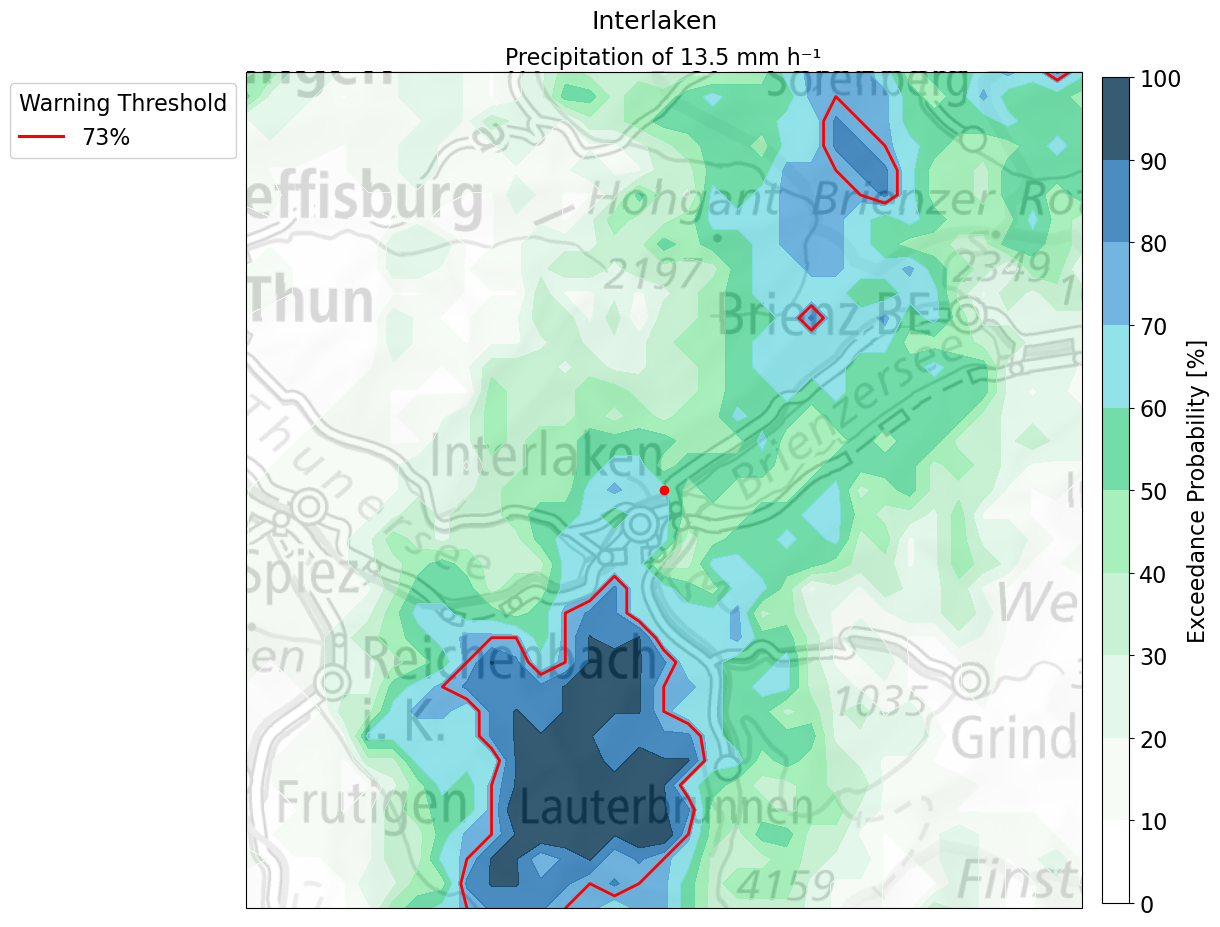

In [11]:
from matplotlib.lines import Line2D

warnings.filterwarnings("ignore")

# extent and figure sizing 
min_x, max_x = float(probability_exceedance_precip.x.min().item()), float(probability_exceedance_precip.x.max().item())
min_y, max_y = float(probability_exceedance_precip.y.min().item()), float(probability_exceedance_precip.y.max().item())
extent_x = max_x - min_x
extent_y = max_y - min_y

fig_size = 13
aspect_ratio = extent_y / extent_x if extent_x != 0 else 1.0
fig_width = fig_size
fig_height = fig_size * aspect_ratio if aspect_ratio >= 1 else fig_size
fig_width = fig_size / aspect_ratio if aspect_ratio < 1 else fig_size

fig = plt.figure(figsize=(fig_width, fig_height))
swiss_proj = ccrs.epsg(2056)
ax = plt.axes(projection=swiss_proj)
ax.set_aspect('1')
ax.set_extent([min_x, max_x, min_y, max_y], crs=swiss_proj)

# background WMS
wms_url = 'https://wms.geo.admin.ch/?'
ax.add_wms(wms_url, 'ch.swisstopo.pixelkarte-grau')
ax.add_wms(wms_url, layers='ch.swisstopo.swissboundaries3d-land-flaeche.fill')

# MeteoSwiss palette
meteoswiss_hex = [
    "#ffffff",  # 0 - 10%
    "#f5fbf5",  # 10 - 20%
    "#dff7e8",  # 20 - 30%
    "#bff0cc",  # 30 - 40%
    "#98eeb0",  # 40 - 50%
    "#59d79a",  # 50 - 60%
    "#7fdfe6",  # 60 - 70%
    "#58a8db",  # 70 - 80%
    "#2b79b6",  # 80 - 90%
    "#123f5a",  # 90 -100%
]

cmap = mcolors.ListedColormap(meteoswiss_hex)

# 10-step boundaries 0,10,20,...,100
levels = np.arange(0, 101, 10)

# BoundaryNorm for discrete bins (clip=True to avoid out-of-range issues)
norm = mcolors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Set plotting alpha (0.0 transparent .. 1.0 opaque)
plot_alpha = 0.85

# Plot discrete probability map
im = ax.contourf(probability_exceedance_precip.x, probability_exceedance_precip.y, probability_exceedance_precip, levels=levels, cmap=cmap, norm=norm,
                 transform=swiss_proj, alpha=plot_alpha, extend='neither')

cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.825, ticks=levels)
cbar.set_label('Exceedance Probability [%]', fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.suptitle(f'{c_name}', fontsize=18, y=0.865, x=0.44)
ax.set_title(f'Precipitation of {precip_threshold} mm h⁻¹', fontsize=16, pad=6)

# add red contour line where probability exceeds 73%
threshold_line = (8/11)*100

cs = ax.contour(
    probability_exceedance_precip.x,
    probability_exceedance_precip.y,
    probability_exceedance_precip,
    levels=[threshold_line],
    colors='red',
    linewidths=2.0,
    transform=swiss_proj,
    linestyles='-'
)
# Add legend
legend_lines = [Line2D([0], [0], color="red", lw=2.2)]
legend_labels = [f'73%']
legend = ax.legend(
    handles=legend_lines,
    labels=legend_labels,
    loc='upper left',
    bbox_to_anchor=(-0.295, 1.0),
    fontsize=16,
    framealpha=0.9,
    title='Warning Threshold',
    title_fontsize=16
)
legend._legend_box.align = "left"

# campground marker
center_x = campgrounds_precip[campgrounds_precip['name'].str.contains(c_name)]['x_cell_nearest'].values[0]
center_y = campgrounds_precip[campgrounds_precip['name'].str.contains(c_name)]['y_cell_nearest'].values[0]
ax.plot(center_x, center_y, 'ro', transform=swiss_proj)

# save
c_name_lower = c_name[0].lower() + c_name[1:]
date_val = str(selected_date)
time_val = int(selected_leadtime)
directory_to_save = f'/scratch2/cwenger/ICON-CH1_monthly/figures_{c_name_lower}'
os.makedirs(directory_to_save, exist_ok=True)
outfn = f'{directory_to_save}/{date_val}_{c_name_lower}_probability_precip_above{precip_threshold}_time{time_val}_over_all_members.png'
plt.savefig(outfn, dpi=150, bbox_inches='tight')


plot the probability map for wind gusts

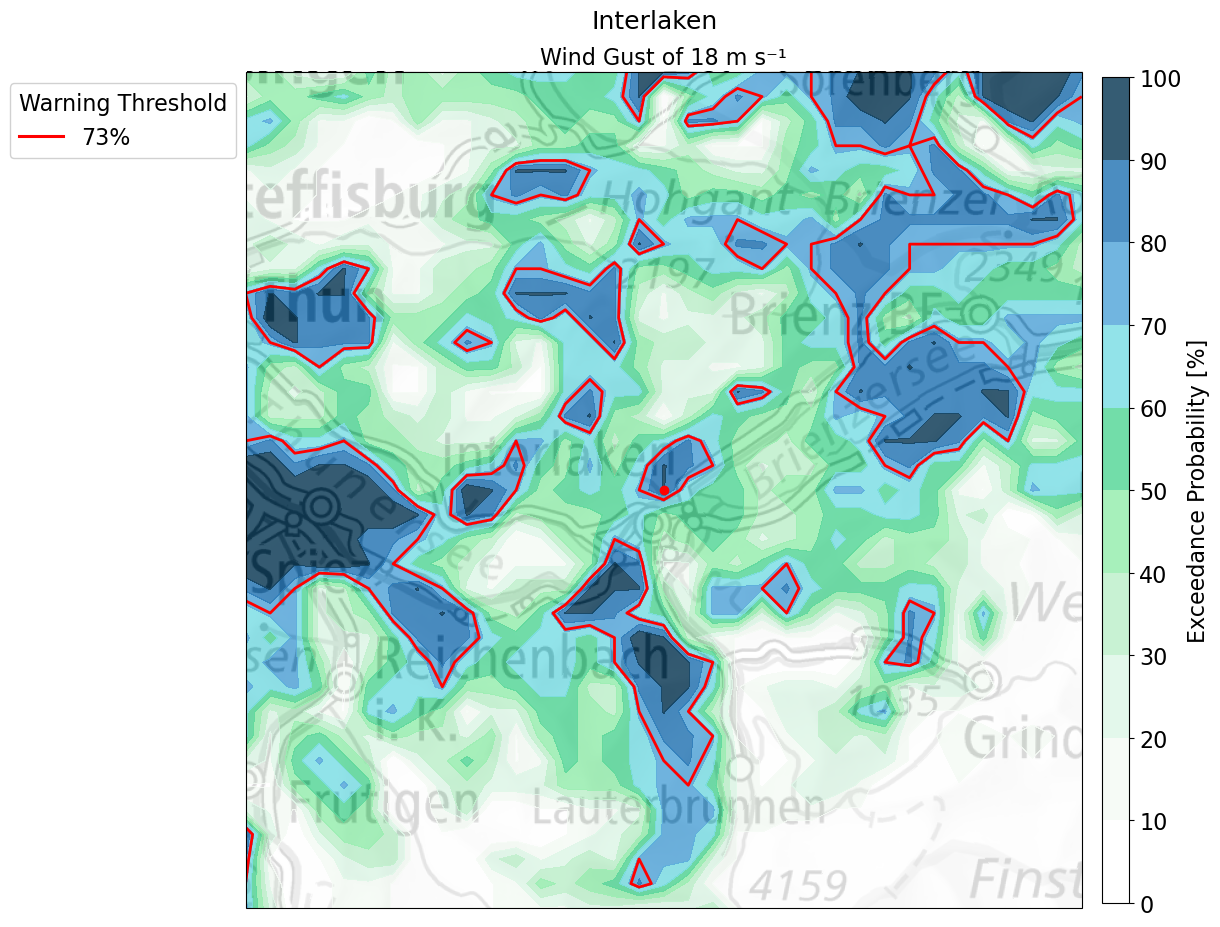

In [12]:
from matplotlib.lines import Line2D

warnings.filterwarnings("ignore")

# extent and figure sizing 
min_x, max_x = float(probability_exceedance_gust.x.min().item()), float(probability_exceedance_gust.x.max().item())
min_y, max_y = float(probability_exceedance_gust.y.min().item()), float(probability_exceedance_gust.y.max().item())
extent_x = max_x - min_x
extent_y = max_y - min_y

fig_size = 13
aspect_ratio = extent_y / extent_x if extent_x != 0 else 1.0
fig_width = fig_size
fig_height = fig_size * aspect_ratio if aspect_ratio >= 1 else fig_size
fig_width = fig_size / aspect_ratio if aspect_ratio < 1 else fig_size

fig = plt.figure(figsize=(fig_width, fig_height))
swiss_proj = ccrs.epsg(2056)
ax = plt.axes(projection=swiss_proj)
ax.set_aspect('1')
ax.set_extent([min_x, max_x, min_y, max_y], crs=swiss_proj)

# background WMS
wms_url = 'https://wms.geo.admin.ch/?'
ax.add_wms(wms_url, 'ch.swisstopo.pixelkarte-grau')
ax.add_wms(wms_url, layers='ch.swisstopo.swissboundaries3d-land-flaeche.fill')

# MeteoSwiss palette
meteoswiss_hex = [
    "#ffffff",  # 0 - 10%
    "#f5fbf5",  # 10 - 20%
    "#dff7e8",  # 20 - 30%
    "#bff0cc",  # 30 - 40%
    "#98eeb0",  # 40 - 50%
    "#59d79a",  # 50 - 60%
    "#7fdfe6",  # 60 - 70%
    "#58a8db",  # 70 - 80%
    "#2b79b6",  # 80 - 90%
    "#123f5a",  # 90 -100%
]

cmap = mcolors.ListedColormap(meteoswiss_hex)

# 10-step boundaries 0,10,20,...,100
levels = np.arange(0, 101, 10)

# BoundaryNorm for discrete bins (clip=True to avoid out-of-range issues)
norm = mcolors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Set plotting alpha (0.0 transparent .. 1.0 opaque)
plot_alpha = 0.85

# Plot discrete probability map
im = ax.contourf(probability_exceedance_gust.x, probability_exceedance_gust.y, probability_exceedance_gust, levels=levels, cmap=cmap, norm=norm,
                 transform=swiss_proj, alpha=plot_alpha, extend='neither')

cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.825, ticks=levels)
cbar.set_label('Exceedance Probability [%]', fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.suptitle(f'{c_name}', fontsize=18, y=0.865, x=0.44)
ax.set_title(f'Wind Gust of {wind_threshold} m s⁻¹', fontsize=16)

# add red contour line where probability exceeds 73%
threshold_line = (8/11)*100

cs = ax.contour(
    probability_exceedance_gust.x,
    probability_exceedance_gust.y,
    probability_exceedance_gust,
    levels=[threshold_line],
    colors='red',
    linewidths=2.0,
    transform=swiss_proj,
    linestyles='-'
)
# Add legend
legend_lines = [Line2D([0], [0], color="red", lw=2.2)]
legend_labels = [f'73%']
legend = ax.legend(
    handles=legend_lines,
    labels=legend_labels,
    loc='upper left',
    bbox_to_anchor=(-0.295, 1.0),
    fontsize=16,
    framealpha=0.9,
    title='Warning Threshold',
    title_fontsize=16
)
legend._legend_box.align = "left"

# campground marker
center_x = campgrounds_gust[campgrounds_gust['name'].str.contains(c_name)]['x_cell_nearest'].values[0]
center_y = campgrounds_gust[campgrounds_gust['name'].str.contains(c_name)]['y_cell_nearest'].values[0]
ax.plot(center_x, center_y, 'ro', transform=swiss_proj)

# save
c_name_lower = c_name[0].lower() + c_name[1:]
date_val = str(selected_date)
time_val = int(selected_leadtime)
directory_to_save = f'/scratch2/cwenger/ICON-CH1_monthly/figures_{c_name_lower}'
os.makedirs(directory_to_save, exist_ok=True)
outfn = f'{directory_to_save}/{date_val}_{c_name_lower}_probability_gust_above{wind_threshold}_time{time_val}_over_all_members.png'
plt.savefig(outfn, dpi=150, bbox_inches='tight')
